# 데이터셋 선택
- [오늘] 자동차 연비 데이터셋 (Auto MPG, UCI) 
: 자동차의 엔진 배기량, 무게, 실린더 수 등과 연비(mpg) 관계 분석

-- *밑에는 할라면 해봐*

- 보스턴 주택 가격 데이터셋 (Boston Housing, sklearn 내장)
: 방 개수, 범죄율, 고속도로 접근성 등과 주택 가격 관계 분석

- 세계 행복 보고서 (World Happiness Report, Kaggle)
: GDP, 사회적 지지, 기대 수명 등과 행복 지수 관계 분석

# 1. 자동차 연비 데이터 분석 시나리오

## 1) 문제 정의

- 질문 -> "자동차의 무게와 배기량은 **연비** 에 어떤 영향을 미칠까?"

- 가설 -> 자동차 무게와 배기량이 증가할수록 **연비** 는 감소할 것이다.

## 2) 데이터 불러오기 & 탐색

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 컬럼 이름 미리 지정
column_names = ["mpg", "cylinders", "displacement", "horsepower", 
                "weight", "acceleration", "model_year", "origin", "car_name"]

df = pd.read_csv("../data/auto-mpg.data", sep='\\s+', names=column_names) # '\s+' 정규표현식에서 하나 이상의 공백이라는 의미


In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [9]:
df['origin'].unique()
df['car_name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

🤔 

- 'mpg'가 연비니까 제일 중요한 변수가 되겠군.

- 'origin'은 국가열인데 (1,2,3)으로 구성되어있네? 이거 단순하게 숫자로 적어놨구나. 
  
    얘는 이대로 분석에 들어가면 돌아는 가겠지만 실제로 의미있는 숫자는 아니니까 원-핫 인코딩이 필요하겠다.

- 'car_name'은 범주형 변수인데 양이 방대하군. LLM(텍스트분석)이 필요하겠어. (지금 못함)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


🤔

결측값 확인해야지~

전체 데이터는 398개

모두 non-null이네?? null도 없네! 개꿀

<분석 중..>

어라라? value error가 뜨네?

info에서 안 뜨는 잘못된 부분이 데이터에 있나보다. 좀 더 자세하게 봐야겠다.

이제 보니까 'horsepower'은 마력이니까 문자형이 숫자여야하는데.. object 타입이잖아?

In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## 3) 데이터 전처리
- 결측치 제거 및 대체 -> 결측값은 없....는 것 처럼 보였으나...
- 'horsepower'에 이상한 값들이 있음 -> 이상한 값 제거하는걸로
- 이상치 제거 -> 간단하게 진행하기 위해 일단 이번 실습에서는 x
- origin 칼럼의 경우 범주형 데이터 (그런데 순서가 없음에도 단순 숫자로 라벨링 되어 있음) -> **원-핫 인코딩** 필요
    - 1 → 미국(USA)
    - 2 → 유럽(Europe)
    - 3 → 일본(Japan)

🤔 origin칼럼(제조국)은 숫자로 구성되어있찌만, 값이 범주형이면 원핫인코딩 필요!

In [11]:
# 값이 있긴하니까 null은 아니었지만.. 알고보니 '?'가 들어가있잖아?!
print(sum(df['horsepower'] == "?"))

df[df['horsepower'] == "?"]


# horsepower은 수치인데 문자형이 object.. 이 때 싸함을 감지했어야했다.
# df.info()를 찍고 unique를 찍어봤다면, '?'를 발견할 수 있었을수도..(개수가 적다는 전재하)

6


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


🤔 

'?' 를 어찌할까?

1. 대체 : 중앙값, 평균값, 최빈값(주로 범주형)

2. 제거 : 논란이 가장 없음. But, 데이터 손실 발생

+. null로 대체하는 것은 상관 회귀에 사용 못함

In [15]:
#6개니까(소수니까) 제거를 한 번 해보자.

# 우선 '?'를 nan값으로 대체. 
df["horsepower"] = df["horsepower"].replace("?", np.nan)

# 그 다음 dropna로 삭제.
df = df.dropna()

In [16]:
print(sum(df['horsepower'] == "?"))

df.isnull().sum()

0


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

🤔 오~ null값이 0개가 되었군. 잘 삭제되었군.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


🤔

근데 아직도 'horsepower'는 문자형 타입.

이런 경우 머신러닝 모델이 이해할 수 없음.

    -> 이것의 타입을 머신러닝 모델이 이해할 수 있는 수치형 형태로 강제 형변환 시켜야겠다.

In [19]:
df["horsepower"] = df["horsepower"].astype(float)

/var/folders/mt/b5bzczgn14s85rhfsvnlr33h0000gn/T/ipykernel_60497/4113809387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["horsepower"] = df["horsepower"].astype(float)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   car_name      392 non-null    object 
 8   origin_2      392 non-null    bool   
 9   origin_3      392 non-null    bool   
dtypes: bool(2), float64(5), int64(2), object(1)
memory usage: 28.3+ KB


🤔 

ㅎㅎ 이제 'horsepower'가 실수형이 됐다.

이번엔 'origin'열 원-핫 인코딩 진행해야겠다.

🤔

원-핫 인코딩

A, B, C -> [1,0,0], [0,1,0], [0,0,1]

- 범주가 2개다 -> 0과 1
- 범주가 3개 이상(순서O 범주) -> 굳이 원핫인코딩 말고 그냥 라벨인코딩
  -  예) 옷사이즈: xs-s-m-l-xl

- 범주가 너무 많다 -> 너무 고차원
  -  이런 경우엔 차원축소를 하거나, 비슷한 범주끼리 묶어버리던가, 불필요한 건 제거하던가

In [ ]:
# get_dummies: 원-핫 인코딩 해주는 함수. 범주형(문자열) 데이터를 0과 1로 변환해서, 머신러닝 모델이 이해할 수 있는 수치형 형태로 바꿔주는 도구
# columns: 어떤 열을 원-핫 인코딩할지 지정
# prefix: 생성되는 더미 열 이름 앞에 붙일 접두사 예) prefix="origin" → origin_Europe, origin_Japan
# drop_first: 더미 변수 함정 회피를 위해 기준집단을 하나 빼서 k-1개 열만 생성(다중공산성 예방)
df = pd.get_dummies(df, columns=["origin"], prefix="origin", drop_first = True)

In [25]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,False,False
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,ford mustang gl,False,False
394,44.0,4,97.0,52.0,2130.0,24.6,82,vw pickup,True,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,dodge rampage,False,False
396,28.0,4,120.0,79.0,2625.0,18.6,82,ford ranger,False,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   car_name      392 non-null    object 
 8   origin_2      392 non-null    bool   
 9   origin_3      392 non-null    bool   
dtypes: bool(2), float64(5), int64(2), object(1)
memory usage: 28.3+ KB


🤔

pd.get_dummies()는 내부적으로 True/False를 1/0처럼 다루지만, 실제 dtype은 "bool"로 저장

pandas 연산에서는 문제없지만, Scikit-Learn / Statsmodels / XGBoost 같은 외부 라이브러리들은 float, int 형만 입력받는 경우 多

그래서 실무에서는 형변환(int형)을 관례적으로 수행!

In [27]:
# bool타입을 int로 변환 -> 이거 안해두면 나중에 회귀할 때 문제 생김
for col in ["origin_2", "origin_3"]:
    df[col] = df[col].astype(int)

In [28]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,ford mustang gl,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,vw pickup,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,dodge rampage,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,ford ranger,0,0


## 4) 상관관계 분석

- 수치형 데이터만 가능
- -> 그래서 범주형 변수인 'car_name'은 빼고 진행하며, 'origin'도 숫자로 맵핑 되어 있지만 사실상 범주형이라 의미 없음

In [30]:
# 상관관계 분석을 위한 수치형 데이터로 이루어진 df생성
df_corr = df.drop(['car_name', 'origin_2', 'origin_3'], axis = 1) ## 범주형이라 뺌

In [31]:
df_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


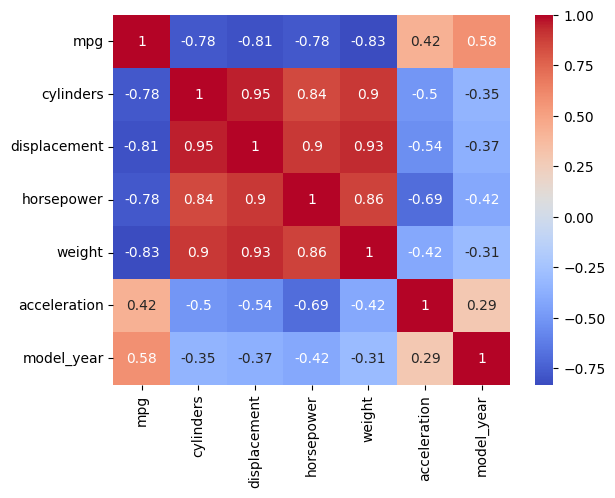

In [ ]:
corr = df_corr.corr() # 피어슨. 상관관계 분석은 이 코드 한 줄이면 끝ㅋ
sns.heatmap(corr, annot=True, cmap="coolwarm")  # 시각화
plt.show()

In [32]:
corr_numeric = df.corr(numeric_only=True) # 숫치형만

corr_numeric

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_2,origin_3
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841
origin_2,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157
origin_3,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000


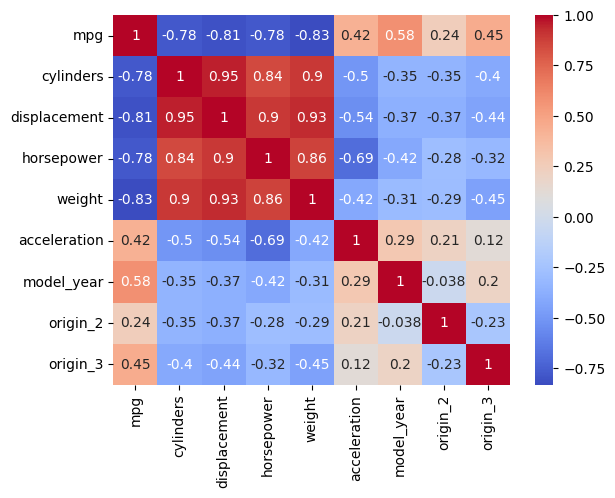

In [25]:
sns.heatmap(corr_numeric, annot=True, cmap="coolwarm")
plt.show()

## 해석

- 연비(mpg)와의 관계

- `weight`, `displacement`, `cylinders`와 강한 음의 상관
    - 차가 무겁거나, 배기량·실린더 수가 많을수록 연비는 떨어진다. (연료 효율이 나쁨)

- `acceleration`, `model_year`와는 양의 상관
    - 가속 성능이 좋거나, 최신 연식일수록 연비가 좋은 경향


🤔

우리가 연비와 다른 요인들 간의 관계를 보고 있기는 한데..

연비와 다른 요인들과의 관계는 사실 상식적으로 알고 있는 내용임.

지금 상관관계 확인을 통해 새로운 발견을 한 것이 아니라 이미 알고 있는 내용을 한 번 눈으로 확인한 느낌.

이런 상황에서 '다중공선성'을 확인해줘야함.

> 다시 한 번 언급하자면, 상관관계를 볼 때 단순히 숫자만 보고 해석할 것이 아니라, 도메인 지식을 바탕으로 봐야한다.

## 다중공선성

- 그런데, 실린더 수가 많을수록 배기량이 크고, 배기량이 크면 차가 무거운 경향
- 사실상 비슷한 정보를 담고 있어서, 회귀 모델에 동시에 넣으면 다중공선성(multicollinearity) 문제 발생 가능
  

- > **다중공선성 문제**
  >
  > 변수들끼리 서로가 높은 상관관계를 가지면,
  >
  > 모델링(특히 회귀분석)에서 하나의 변수 영향이 과대·과소평가될 수 있음
  >


- 특징 선택(feature selection)을 진행하여 이 중에 **하나만 선택**하는 것을 권장 
- > **특징 선택**
  >
  > - 도메인 지식을 바탕으로 수동으로 하던가,
  > 
  > - VIF를 써서 고르던가,
  >
  > - 차원축소 기법을 사용하던가

    -> 하지만 일단 이렇게 두고 있다가 회귀 진행해볼게요 (보여주고 싶은게 있어서)

🤔

기초플젤할 때는 상관성만 봤지? 근데 이제는 '다중공선성'도 해야해!

상관관계를 봐도 잘 모르겠다? VIF 체크

근데 짬이 좀 차면, 딱 봤을 때 '아! 얘 다중공선성 있네ㅋ'할 수도 있음 

In [26]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [27]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
X = df[["weight", "displacement", "cylinders"]]
X = sm.add_constant(X) # 상수항 추가 -> 없으면 부정확할 수 있음 (없으면 회귀직선이 반드시 원점을 지나야 하는 특수한 상황이어야 하기 때문)
for i in range(X.shape[1]):
    print(variance_inflation_factor(X.values, i))

46.555990178228576
7.788716310583581
15.786455411619693
10.51550774255063


🤔

위의 결과를 봤다면, 'displacement'와 'cyilnders'를 제거하고 회귀를 진행해야함. 

심각한 다중공산성은 과감하게 없애주기.

혹시 얘네들을 합쳐서 파생변수를 만들고싶다면? -> 도메인 지식이 필요함

### 해석
- VIF ≈ 1 → 다중공선성 없음

- VIF 5 이상 → 다중공선성 의심, 주의 필요

- VIF 10 이상 → 심각한 다중공선성

- (상수항은 해석 대상이 아님)

### 상수항을 왜 추가할까?

- 모든 변수가 0이더라도 y가 꼭 0이 되리란 보장은 없음 -> 상수항 필요
- 이론적으로 “원점(0,0)”을 반드시 지나야 하는 물리적 모델이거나 데이터를 평균 중심화 한다면 상수항이 필요 없을 수 있음
  

### 코드 좀 더 다듬은 버젼

In [29]:
# 좀더 깔끔하게 코드를 다듬어서 사용한다면?

# 다중회귀에 쓴 변수들
X = df[["weight", "displacement", "cylinders"]]

# 상수항 추가
X = sm.add_constant(X)

# VIF 계산
vif_df = pd.DataFrame()
vif_df["variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

       variable        VIF
0         const  46.555990
1        weight   7.788716
2  displacement  15.786455
3     cylinders  10.515508


### 회귀 배경지식 :

머신러닝 회귀 vs 통계학 회귀
- 원리는 같음
- 솔루션이 다름

통계학 회귀 : 최소 자승법(복잡한 수학 계산) like 선형대수

머신러닝 회귀 : 경사 하강법 -> 경험적으로 정답을 찾아가나가는 느낌

## 5) 단순 선형 회귀

- 독립변수 1개랑 종속변수 1개랑 관계 보는 거

In [30]:
import statsmodels.api as sm

X = df["weight"]
y = df["mpg"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Fri, 26 Sep 2025   Prob (F-statistic):          6.02e-102
Time:                        13:03:22   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.0

![단순선형회귀분석사진](../images/단순선형회귀해석.jpg)

## 해석
1. **모형 설명력**

- `R-squared[0,1] = 0.693`

    → 차량 무게(weight) 하나만으로 연비(mpg) 변동의 약 69.2%를 설명할 수 있음.

    → 단일 독립변수치고는 상당히 높은 설명력.

2. **회귀계수**

- `const(절편) = 46.2165`

    → 이론적으로 차량 무게가 0일 때 예상 연비는 약 46.2 mpg. (실제 의미는 없고 기준선 역할)

    → 상수값 추가해서 좀 더 다양한 회귀 방정식을 그을 수 있다.

- `weight = -0.0076`

    → 차량 무게가 1 파운드 늘어날 때마다 연비는 평균적으로 0.0076 mpg 감소.

    → 예: 차량 무게가 1,000 파운드 증가하면 연비는 약 7.6 mpg 줄어듦.

3. **통계적 유의성**

- `weight의 p-value = 0.000` (유의수준 0.05보다 훨씬 작음)

    → 무게가 연비에 유의미한 영향을 준다고 볼 수 있음.

- `const도 p-value=0.000`으로 통계적으로 유의.

4. **신뢰구간**

- `weight의 95% 신뢰구간: [-0.008, -0.007]`

    → 계수가 음수임이 확실하다 → 무게 증가 → 연비 감소.

### 회귀에서의 가설검정(t-test)
- 귀무가설 : 해당 변수가 종속변수에 유의한 영향을 주지 않는다
- 대립가설 : 해당 변수가 유의미한 영향을 준다

## 6) 다중 회귀

In [ ]:
# "displacement", "cylinders" 얘넨 회귀까지 가지고와봤자 무쓸모. 근데 일단 해보기는 했음
# weight가 하드캐리 dis~랑 cyl~은 보조

X = df[["weight", "displacement", "cylinders"]] 
y = df["mpg"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     300.8
Date:                Fri, 26 Sep 2025   Prob (F-statistic):          7.59e-101
Time:                        13:03:22   Log-Likelihood:                -1125.7
No. Observations:                 392   AIC:                             2259.
Df Residuals:                     388   BIC:                             2275.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.3710      1.481     29.967   

![다중회귀분석사진](../images/다중회귀해석.jpg)

# 해석

1. 모형 설명력

- `R-squared = 0.699`, `Adj. R-squared = 0.697`

    → 세 변수를 함께 쓰면 연비 변동의 약 69.8%를 설명.

    → 이전 단순회귀(weight만)와 비교하면 R² 0.693 → 0.699로 거의 차이가 없음.
    
    → 추가 변수들이 설명력 개선에 별로 기여하지 못했음.

2. 회귀계수 & 유의성

- `weight = -0.0057 (p = 0.000)`

    → 유의하게 음의 영향. 무게가 1 파운드 증가할 때 연비가 약 0.0058 mpg 감소.

    → 여전히 주요 설명 변수.

- `displacement = -0.0127 (p = 0.125)`

    → 음의 계수이지만 통계적으로 유의하지 않음. (연비에 독립적 영향 못 줌)

- `cylinders = -0.2678 (p = 0.517)`
    → 계수도 작고 p-value도 큼. 연비에 유의한 설명력을 주지 못함.

### Adj.(Adjusted) R-squared는 뭐지? 
- 기존의 R-squared는 독립변수가 많으면 많을 수록 값이 무조건 커지는 경향이 있음 따라서, 변수 개수를 고려해서 보정한 값이 이것!
- 즉, 변수 계수를 고려한 실질적인 R-squared 계수!

In [32]:
df_reg = df.drop(['car_name', 'mpg'], axis = 1)

In [33]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    float64
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin_2      392 non-null    int64  
 7   origin_3      392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [ ]:
X = df_reg
y = df["mpg"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Fri, 26 Sep 2025   Prob (F-statistic):          1.79e-139
Time:                        13:03:22   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.9546      4.677     -3.839   

# 해석

1. 모델 적합도

- R-squared = 0.824, Adj. R-squared = 0.821
→ 이 모델은 연비 변동의 82% 이상을 설명함.

- F-statistic (224.5, p < 0.001)
→ 전체 회귀모형이 통계적으로 유의함.

2. 회귀계수 해석

- weight = -0.0067 (p < 0.001)
→ 무게가 1 파운드 늘면 연비가 0.0067 mpg 줄어듦 → 강하게 유의.

- cylinders = -0.4897 (p = 0.128)
→ 음의 관계지만 유의하지 않음.

- displacement = +0.0240 (p = 0.022)
→ 배기량이 커질수록 연비가 늘어난다고 나오지만, 실제로는 weight 등 다른 변수와의 다중공선성 때문일 가능성 높음.

- horsepower = -0.0182 (p = 0.185)
→ 유의하지 않음.

- acceleration = +0.0791 (p = 0.805)
→ 영향 거의 없음.

3. 시대적 요인

- model_year = +0.7770 (p < 0.001)
→ 연식이 1년 증가할 때마다 연비가 평균적으로 0.78 mpg 늘어남.
→ 시간이 지날수록 연비 기술 발전(오일 쇼크 이후의 연비 개선 정책 반영).

4. 제조 지역(origin, 기준 = 미국)

- origin_1 (USA): -5.8595 (p < 0.001)
→ 미국차는 기준 대비 연비가 평균적으로 5.9 mpg 낮음.

- origin_2 (Europe): -3.2295 (p = 0.005)
→ 유럽차는 기준 대비 연비가 3.2 mpg 낮음.

- origin_3 (Japan): -3.0062 (p = 0.015)
→ 일본차는 기준 대비 연비가 3.0 mpg 낮음.

### 해석
연비는 차량 무게가 무거울수록 줄고, 연식이 최근일수록 증가하며, 국가별 차이도 유의하게 존재한다. 하지만 엔진 관련 변수들은 서로 강하게 상관되어 있어 다중공선성 문제가 크므로 변수 선택이 필요하다

## 7) 예측 및 시각화

- 시각적으로도 "weight", "displacement", "cylinders" 가 증가할수록 연비가 감소하는 추세 확인

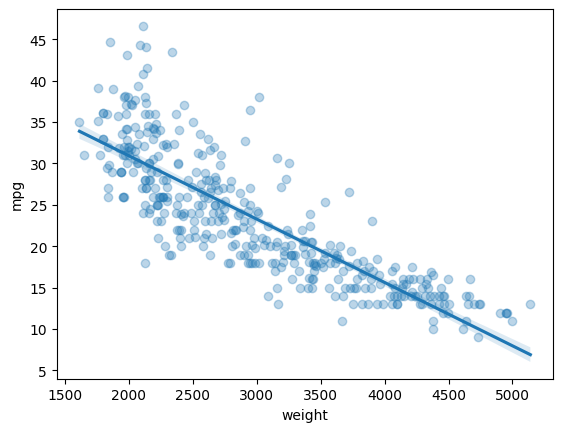

In [35]:
sns.regplot(x="weight", y="mpg", data=df, scatter_kws={"alpha":0.3})
plt.show()


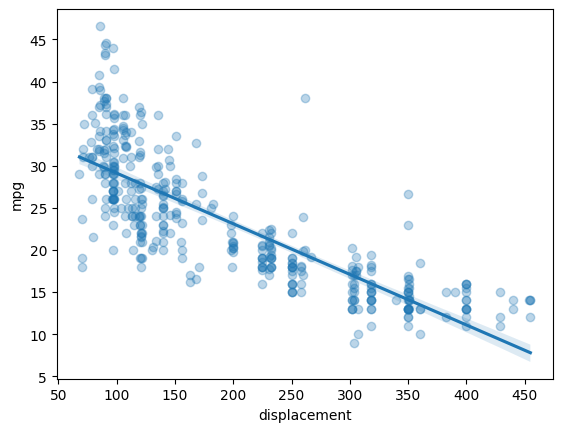

In [36]:
sns.regplot(x="displacement", y="mpg", data=df, scatter_kws={"alpha":0.3})
plt.show()

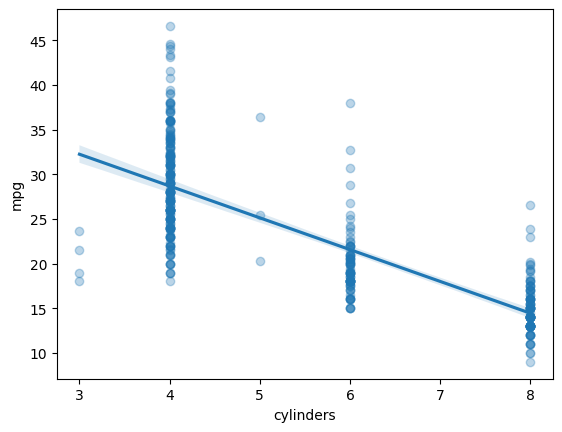

In [37]:
sns.regplot(x="cylinders", y="mpg", data=df, scatter_kws={"alpha":0.3})
plt.show()


🤔 실린더는 분포(?)가 넓은편이라 좀 애매함

## 8) 다중 회귀 (변수선택 고려해서)

In [ ]:
# 다중공선성 있는 거 빼고, 관계 없어 보이는 거 빼볼게~
df_reg2 = df.drop(['car_name', 'mpg', 'cylinders', 'acceleration', 'horsepower', 'displacement'], axis = 1)
df_reg2 # 훨씬 슬림해짐

,weight,model_year,origin_2,origin_3
0,3504.0,70,0,0
1,3693.0,70,0,0
2,3436.0,70,0,0
3,3433.0,70,0,0
4,3449.0,70,0,0
...,...,...,...,...
393,2790.0,82,0,0
394,2130.0,82,1,0
395,2295.0,82,0,0
396,2625.0,82,0,0


In [39]:
X = df_reg2
y = df["mpg"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     437.9
Date:                Fri, 26 Sep 2025   Prob (F-statistic):          3.53e-142
Time:                        13:03:22   Log-Likelihood:                -1026.1
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     387   BIC:                             2082.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.3069      4.017     -4.557      0.0

1. 모델 적합도

- R-squared = 0.819, Adj. R-squared = 0.817
→ 연비 변동의 약 82% 설명.
→ 이전 모델과 설명력은 동일, 다중공선성 경고도 완화됨.

- F-statistic = 437.9, p < 0.001
→ 전체 모델 유의.

2. 회귀계수 해석

- const = -18.3069
→ 이론적으로 모든 변수가 0일 때의 mpg (실제 의미보다는 절편 역할).

- weight = -0.0059 (p < 0.001)
→ 무게가 1 파운드 증가할 때 연비는 0.0059 mpg 감소.
→ 차량 무게는 여전히 가장 중요한 설명 변수.

- model_year = +0.7698 (p < 0.001)
→ 연식이 1년 늘어날 때마다 연비가 0.77 mpg 증가.
→ 시간이 지날수록 기술 발전 → 연비 개선.

- origin_2 (Europe) = +1.9763 (p < 0.001)
→ 유럽산 자동차는 미국산 대비 평균 약 2.0 mpg 더 높음.

- origin_3 (Japan) = +2.2145 (p < 0.001)
→ 일본산 자동차는 미국산 대비 평균 약 2.2 mpg 더 높음.

통계학 -> 0.05 유의수준이 과연 옳은가?

- 심리학 -> 최근 발표한 심리학 연구(통계학 분석)들을 다시 재조사 -> 재현성 30%

- 고려대학교에 물리학과 교수님들이 (상온에서) 초전도체발견! K-초전도체 -> 노벨 물리학상, 한국 최초의 노벨 과학상? -> 재현 X

-> 0.001 -> 제2종 오류의 확률이 높아짐 -> 데이터개수를 늘리는것! -> p값을 0.05 잡을 때 대비 데이터개수를 더 늘리면서 -> p값을 0.001로 잡아가는것이 이상적



## 비즈니스 해석

### (1) 차량 무게(weight)

- 무게가 연비에 가장 큰 음(-)의 영향을 미침 (coef ≈ -0.006, p<0.001).

- -> 차량을 가볍게 만들수록 연비가 좋아진다.

- 시사점:

    - 경량화 소재(알루미늄, 탄소섬유 등) 기술 투자

    - 불필요한 옵션·부품 최적화로 무게 감축 전략 필요

## (2) 연식(model_year)

- 연식이 1년 증가할수록 연비는 약 0.77 mpg 개선 (p<0.001).

- -> 시간이 지나면서 신차의 연비 성능이 꾸준히 개선됨 → 기술 발전, 규제 영향 반영.

- 시사점:

    - 신차 마케팅에서 “연비 개선”을 핵심 포인트로 강조

    - 장기적으로 친환경차(하이브리드, 전기차) 개발 경쟁에서 앞서야 함

### (3) 제조국(origin)

- 미국(기준) 대비:

    - 유럽차: +2.0 mpg

    - 일본차: +2.2 mpg

- -> 미국차 대비 유럽·일본차의 연비 효율이 높음.

- 시사점:

    - 미국 업체: 글로벌 시장 경쟁에서 불리 → 연비 규제 대응 필요

    - 유럽·일본 업체: 연비 우수성을 마케팅 포인트로 활용 가능

    - 지역별 기술 차이를 벤치마킹해 전략적 협력 또는 기술 도입 고려

## 앞으로 더 분석해볼 수 있는 것

### (1) 세분화 분석(Segmentation)

차종별, 배기량 구간별, 실린더 수별로 그룹 나눠 연비 차이 확인

“어떤 세그먼트에서 연비 차이가 가장 크나?” 분석

방법

1. 분석가가 임의로 기준 잡아서 segment를 나누던가
2. 통계적 방법(quantile)
3. 머신러닝 기법(클러스터링)

### (2) 비선형 관계 탐색

weight, horsepower vs mpg 관계가 단순 직선이 아닐 수도 있음

다항회귀(polynomial regression)나 곡선 피팅으로 관계 개선 가능

### (3) ANOVA & 사후검정

origin 집단 간 mpg 차이를 ANOVA → Tukey 등 사후검정으로 확인

단순히 미국 vs 일본, 미국 vs 유럽뿐 아니라 집단 전체 차이 분석

### (4) 예측 모델 확장

통계적 회귀분석 → 머신러닝 회귀모델(Random Forest, XGBoost)로 확장

더 높은 예측 정확도로 연비 예측 → 신차 개발 시 시뮬레이션 활용

## (추가로 해보고 싶으신 분을 위해) 비선형 관계 탐색

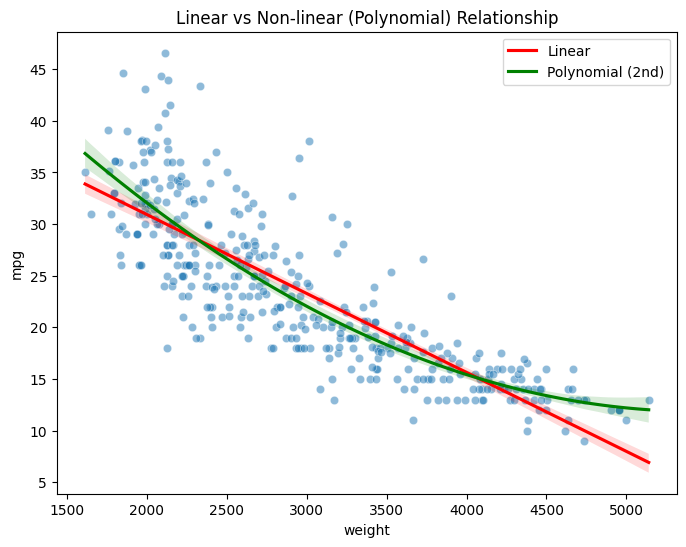

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="weight", y="mpg", data=df, alpha=0.5)

# 선형 회귀선
sns.regplot(x="weight", y="mpg", data=df, scatter=False, color="red", label="Linear")

# 2차 다항 회귀선
sns.regplot(x="weight", y="mpg", data=df, scatter=False, order=2, color="green", label="Polynomial (2nd)")

plt.legend()
plt.title("Linear vs Non-linear (Polynomial) Relationship")
plt.show()

In [ ]:
from scipy.stats import pearsonr # 피어슨54


r, pval = pearsonr(df["weight"], df["mpg"])
print(f"Pearson correlation: r = {r:.3f}, p-value = {pval:.5f}")

Pearson correlation: r = -0.832, p-value = 0.00000


In [42]:
from scipy.stats import spearmanr # 단조 관계에 잘 맞음 (X가 증가하면 Y도 증가하거나 감소하는데 속도가 일정할 필요는 X)

rho, pval = spearmanr(df["weight"], df["mpg"])
print(f"Spearman correlation: {rho:.3f}, p-value: {pval:.5f}")


Spearman correlation: -0.876, p-value: 0.00000


In [43]:
from scipy.stats import kendalltau # 작은 표본에 강점

tau, pval = kendalltau(df["weight"], df["mpg"])
print(f"Kendall's tau: {tau:.3f}, p-value: {pval:.5f}")


Kendall's tau: -0.694, p-value: 0.00000



🤔

- 스피어만 상관계수(Spearman Rank Correlation Coefficient) (=비모수 상관계수)

    : 두 변수의 순위 간의 의존성/일관성을 측정하는 비모수적 척도

  - 값이 아니라 순서만 반영하기 때문에, 데이터가 꼭 선형 관계일 필요가 없음.

  - 곡선(비선형)관계도 잡아냄

- 켄달의 타우 상관계수(Kendall's Tau Correlation Coefficient)

    : 두 변수 간의 순위가 얼마나 일치하는지를 측정하는 비모수적 척도

  - 순위 간의 일치 쌍 및 불일치 쌍의 비율을 바탕으로 계산


- 스웨덴에서 송전탑 근처에 거주한것 -> 질병(소아암, 소아백혈병)을 일으킨다
- -> 이 때 가설검정으로 송전탑 거리 / 질병여부 -> 유의수준 보다 낮아서 의미가 있다! 즉, 송전탑 근처에 거주 -> 중대한 질병
- 제1종 오류 무시 -> 몇% 오류가 항상 있을 수 있다 -> 재수없으면 유의미하다 나왔지만(잘못된 것일 수 있죠 낮은 확률로)
- -> 나중에 실험을 다시합니다 (재현) -> 아무 의미 없다


-> 송전탑 근처에서 사는건 저는 반대 -> 풍수지리